# Calculating the persistence length of polymers using MDAnalysis

In analysing polymers, the persistence length is a measure of a chains stiffness.  The persistence length is the distance at which the direction of two points on a polymer chain becomes decorrelated.  High persistence lengths indicate that the polymer chain is rigid and doesn't change direction, low persistence lengths indicate that the polymer chain has little memory of its orientation.

The bond autocorrelation function $C(n)$ measures the average cosine of the angle between bond vector $\mathbf{a_i}$ and a bond vector $n$ bonds away. 

$$C(n) = \langle \cos\theta_{i, i+n} \rangle= \langle \mathbf{a_i} \cdot \mathbf{a_{i+n}} \rangle$$

This is then fitted to an exponential decay, where $l_B$ is the average bond length, and $l_P$ is the persistence length.


$$C(n) \approx \exp\left(-\frac{n l_B}{l_P}\right)$$

To get started, we'll need to import `MDAnalysis` and the `PersistenceLength` tool.  This tutorial was made to work on version 0.18.0 onwards of MDAnalysis.

In [1]:
from __future__ import print_function
import MDAnalysis as mda
from MDAnalysis.analysis.polymer import PersistenceLength
import matplotlib.pyplot as plt
%matplotlib inline

Next we'll load up a Universe.
This example is working with a single frame of a polyamide system.
In this system, each chain is a unique residue, this is defined within our topology file.

In [2]:
u = mda.Universe('plength.gro')
print('We have a universe: {}'.format(u))
print('We have {} chains'.format(len(u.residues)))
print('Our atom types are: {}'.format(set(u.atoms.types)))

We have a universe: <Universe with 18360 atoms>
We have 24 chains
Our atom types are: {'C', 'O', 'N', 'H'}


We'll need to create an AtomGroup (an array of atoms) for each polymer chain.
As our polymer chain is linear, we can select the backbone atoms based on the atom type.

In [3]:
ags = [r.atoms.select_atoms('type C or type N') for r in u.residues]
list(ags)

[<AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>,
 <AtomGroup with 281 atoms>]

It is important that the contents of each AtomGroup are in order.  Selections done using `select_atoms` will always be sorted.

This can be checked by listing the AtomGroup.

In [4]:
list(ags[0][:10])

[<Atom 1: Ch1 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 4: Ch4 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 7: Ch7 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 10: Ch10 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 13: Ca13 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 15: N15 of type N of resname PA, resid 1 and segid SYSTEM>,
 <Atom 17: Ch17 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 20: Ch20 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 23: Ch23 of type C of resname PA, resid 1 and segid SYSTEM>,
 <Atom 26: Ch26 of type C of resname PA, resid 1 and segid SYSTEM>]

This list of AtomGroups is the required input for the `PersistenceLength` analysis class.

After creating the instance, we call the `run` method on it to perform the calculation.  In this case, the Universe only has a single frame to analyse, however the tool would normally iterate over all available frames to gather better statistics.

In [5]:
p = PersistenceLength(ags)
p.run()

This has created the `.results` attribute on the analysis class.

Plotting this can let us see $C(n)$.  The function becomes noiser at high values (where the statistics are poorer), but is quite smooth for lower values.  This is because there are many ways to measure $C(1)$, but few ways to measure $C(100)$.

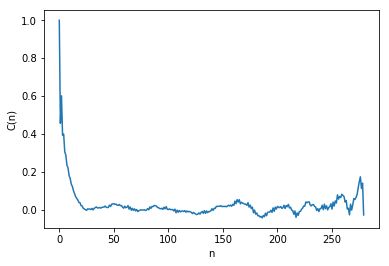

In [6]:
plt.ylabel('C(n)')
plt.xlabel('n')
plt.plot(p.results)

The tool can then perform the exponential decay fit for us, which populate the `.lp` attribute.

In [7]:
p.perform_fit()
print("The persistence length is {:.4f} A".format(p.lp))

The persistence length is 6.5044 A


Finally to check the validity of the fit, we can plot the fit against the results.

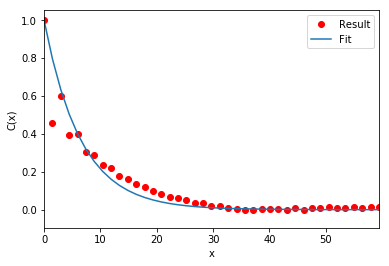

In [8]:
p.plot()